In [1]:
import astropy.units as u
import matplotlib.pyplot as plt

import pint.fitter
from pint.models import get_model_and_toas
from pint.residuals import Residuals
import pint.logging

pint.logging.setup(level="INFO")

1

In [29]:
parfile= "J1253-5820.par"
timfile= "J1253-5820_p1.tim"

m, t_all = get_model_and_toas(parfile, timfile)
m

INFO     (pint.toa                      ): Using CLOCK = TT(TAI), so setting include_bipm = False


TimingModel(
  AbsPhase(
    MJDParameter(   TZRMJD              57777.6833306245295485 (d) frozen=True),
    strParameter(   TZRSITE             mo                frozen=True),
    floatParameter( TZRFRQ              835.216003        (MHz) frozen=True)),
  AstrometryEquatorial(
    MJDParameter(   POSEPOCH            57600.0000000000000000 (d) frozen=True),
    floatParameter( PX                  0.0               (mas) frozen=True),
    AngleParameter( RAJ                 12:53:28.41893910 (hourangle) +/- 0h00m00.0028136s frozen=False),
    AngleParameter( DECJ                -58:20:40.47570000 (deg) +/- 0d00m00.025422s frozen=False),
    floatParameter( PMRA                0.0               (mas / yr) frozen=True),
    floatParameter( PMDEC               0.0               (mas / yr) frozen=True)),
  DispersionDM(
    floatParameter( DM                  100.584           (pc / cm3) +/- 0.004 pc / cm3 frozen=True),
    floatParameter( DM1                 UNSET,
    MJDParameter(   DM

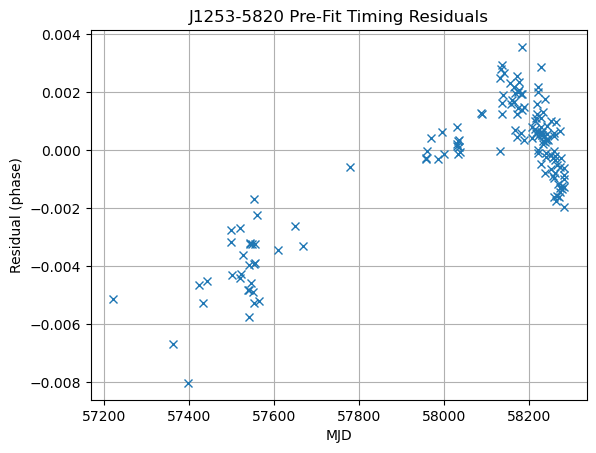

In [30]:
rs = Residuals(t_all, m).phase_resids
xt = t_all.get_mjds()
plt.figure()
plt.plot(xt, rs, "x")
plt.title(f"{m.PSR.value} Pre-Fit Timing Residuals")
plt.xlabel("MJD")
plt.ylabel("Residual (phase)")
plt.grid()

In [31]:
t_all.print_summary()

Number of TOAs:  147
Number of commands:  2
Number of observatories: 1 ['most']
MJD span:  57221.228 to 58282.404
Date span: 2015-07-18 05:27:51.555269091 to 2018-06-13 09:41:52.149831996
most TOAs (147):
  Min freq:      834.129 MHz
  Max freq:      835.474 MHz
  Min error:     82.8 us
  Max error:     463 us
  Median error:  193 us



In [32]:
error_ok = t_all.table["error"] <= 1000* u.us
t = t_all[error_ok]
t.print_summary()



Number of TOAs:  147
Number of commands:  2
Number of observatories: 1 ['most']
MJD span:  57221.228 to 58282.404
Date span: 2015-07-18 05:27:51.555269091 to 2018-06-13 09:41:52.149831996
most TOAs (147):
  Min freq:      834.129 MHz
  Max freq:      835.474 MHz
  Min error:     82.8 us
  Max error:     463 us
  Median error:  193 us



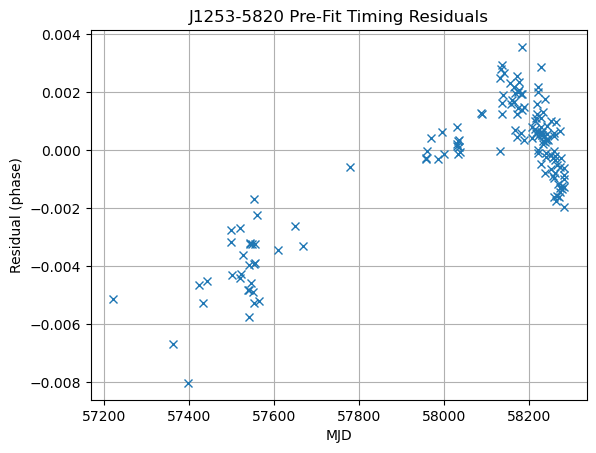

In [33]:
rs = Residuals(t, m).phase_resids
xt = t.get_mjds()
plt.figure()
plt.plot(xt, rs, "x")
plt.title(f"{m.PSR.value} Pre-Fit Timing Residuals")
plt.xlabel("MJD")
plt.ylabel("Residual (phase)")
plt.grid()

In [34]:
f = pint.fitter.Fitter.auto(t, m)
f.fit_toas()

INFO     (pint.fitter                   ): For narrowband TOAs with correlated errors and downhill fitter, returning 'DownhillGLSFitter'


True

In [35]:
f.print_summary()


Fitted model using downhill_gls method with 4 free parameters to 147 TOAs
Prefit residuals Wrms = 446.76317920883724 us, Postfit residuals Wrms = 382.3962645576531 us
Chisq = 130.365 for 142 d.o.f. for reduced Chisq of 0.918

PAR                   Prefit                  Postfit            Units
============== ==================== ============================ =====
PSR                      J1253-5820 J1253-5820                   None
EPHEM                         DE430 DE430                        None
CLOCK                       TT(TAI) TT(TAI)                      None
UNITS                           TDB TDB                          None
START                       57221.2                      57221.2 d 
FINISH                        58427                      58282.4 d 
DILATEFREQ                        N                              None
DMDATA                            N                              None
NTOA                            204                              None 
CHI2 

In [36]:
nu1=3.913926700304
nu2=3.913926700
nudot1=-3.22489e-14
nudot2=-3.225e-14
dt_days=(58427+58230.5)/2-(58229.5+57221.2)/2
dt=dt_days*24*60*60

In [37]:
n=1+(nu1*nudot2-nu2*nudot1)/(nudot1*nudot2*dt)
print(n)

-78.40405640547596


In [ ]:
nu1=3.913926700304
nu2=3.913926700
nudot1=-3.22489e-14
nudot2=-3.225e-14
dt_days=(58427+58230.5)/2-(58229.5+57221.2)/2
dt=dt_days*24*60*60